# Соревнование House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(test.shape,'\n',
data.shape)

(1459, 80) 
 (1460, 81)


In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Разделение признаков на вещественные, категориальные и порядковые.

In [7]:
category_features = ['MSSubClass','MSZoning','Street','Alley','LotShape', 'LandContour',
                    'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                     'Condition2','BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                     'MasVnrType','Foundation','Heating','CentralAir', 'Electrical','GarageType','PavedDrive',
                     'Fence','MiscFeature','SaleType','SaleCondition'
                    ]

In [8]:
num_features = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2',
               'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea','MiscVal']

In [9]:
ordeal_features = ['OverallQual', 'OverallCond','YearBuilt','YearRemodAdd',
                  'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond',
                   'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                   'HeatingQC','BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                   'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                   'TotRmsAbvGrd', 'Functional','Fireplaces', 'FireplaceQu', 
                    'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageQual',
                   'GarageCond', 'PoolQC','MoSold', 'YrSold'                   
                  ]

Беглый анализ на наличие выбросов

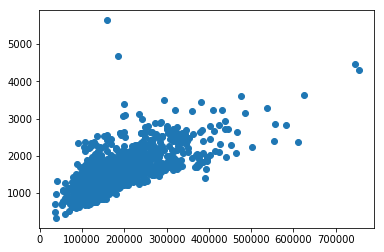

In [10]:
plt.scatter(data.SalePrice, data.GrLivArea)

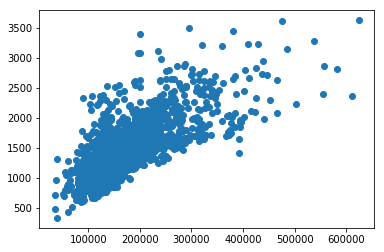

In [11]:
plt.scatter(data[data.GrLivArea < 4000].SalePrice, data[data.GrLivArea < 4000].GrLivArea)

In [12]:
data = data[data.GrLivArea < 4000]

In [13]:
data[category_features] = data[category_features].fillna('NaN').astype('category')
data[category_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 29 columns):
MSSubClass       1456 non-null category
MSZoning         1456 non-null category
Street           1456 non-null category
Alley            1456 non-null category
LotShape         1456 non-null category
LandContour      1456 non-null category
Utilities        1456 non-null category
LotConfig        1456 non-null category
LandSlope        1456 non-null category
Neighborhood     1456 non-null category
Condition1       1456 non-null category
Condition2       1456 non-null category
BldgType         1456 non-null category
HouseStyle       1456 non-null category
RoofStyle        1456 non-null category
RoofMatl         1456 non-null category
Exterior1st      1456 non-null category
Exterior2nd      1456 non-null category
MasVnrType       1456 non-null category
Foundation       1456 non-null category
Heating          1456 non-null category
CentralAir       1456 non-null category
Electrical   

In [14]:
data[num_features] = data[num_features].fillna(0)
data[num_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 17 columns):
MasVnrArea       1456 non-null float64
BsmtFinSF1       1456 non-null int64
BsmtFinSF2       1456 non-null int64
BsmtUnfSF        1456 non-null int64
TotalBsmtSF      1456 non-null int64
1stFlrSF         1456 non-null int64
2ndFlrSF         1456 non-null int64
LowQualFinSF     1456 non-null int64
GrLivArea        1456 non-null int64
GarageArea       1456 non-null int64
WoodDeckSF       1456 non-null int64
OpenPorchSF      1456 non-null int64
EnclosedPorch    1456 non-null int64
3SsnPorch        1456 non-null int64
ScreenPorch      1456 non-null int64
PoolArea         1456 non-null int64
MiscVal          1456 non-null int64
dtypes: float64(1), int64(16)
memory usage: 204.8 KB


In [15]:
data[ordeal_features] = data[ordeal_features].fillna('NaN').astype('str')
data[ordeal_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 31 columns):
OverallQual     1456 non-null object
OverallCond     1456 non-null object
YearBuilt       1456 non-null object
YearRemodAdd    1456 non-null object
ExterQual       1456 non-null object
ExterCond       1456 non-null object
BsmtQual        1456 non-null object
BsmtCond        1456 non-null object
BsmtExposure    1456 non-null object
BsmtFinType1    1456 non-null object
BsmtFinType2    1456 non-null object
HeatingQC       1456 non-null object
BsmtFullBath    1456 non-null object
BsmtHalfBath    1456 non-null object
FullBath        1456 non-null object
HalfBath        1456 non-null object
BedroomAbvGr    1456 non-null object
KitchenAbvGr    1456 non-null object
KitchenQual     1456 non-null object
TotRmsAbvGrd    1456 non-null object
Functional      1456 non-null object
Fireplaces      1456 non-null object
FireplaceQu     1456 non-null object
GarageYrBlt     1456 non-null object
Garag

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
summary = pd.concat([data.drop('SalePrice', axis = 1), test])
summary[num_features] = summary[num_features].fillna(0)
summary[category_features] = summary[category_features].fillna('NaN').astype('category')
summary[ordeal_features] = summary[ordeal_features].fillna('NaN').astype('str')
summary.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [18]:
X_cat = pd.get_dummies(summary[summary.Id < 1461][category_features])

In [19]:
X_cat.shape

(1456, 208)

In [20]:
X_ord = OrdinalEncoder().fit_transform(summary[summary.Id < 1461][ordeal_features])

In [21]:
X_ord.shape

(1456, 31)

In [22]:
X_num = summary[summary.Id < 1461][num_features]

In [23]:
X_num.shape

(1456, 17)

In [24]:
X_cat_test = pd.get_dummies(summary[summary.Id >= 1461][category_features])
X_cat_test.shape

(1459, 208)

In [25]:
X_ord_test = OrdinalEncoder().fit_transform(summary[summary.Id >= 1461][ordeal_features])
X_ord_test.shape

(1459, 31)

In [26]:
X_num_test = summary[summary.Id >= 1461][num_features]
X_num_test.shape

(1459, 17)

In [27]:
X_all = np.hstack((X_num, X_cat, X_ord))
X_all_test = np.hstack((X_num_test, X_cat_test, X_ord_test))

In [28]:
print(X_all.shape, X_all_test.shape)

(1456, 256) (1459, 256)


In [29]:
from sklearn.decomposition import PCA
# методом главных компонент понизим размерность на один, чтобы избежать эффекта мультиколлинеарности

In [30]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, \
RobustScaler, MaxAbsScaler, MinMaxScaler

In [31]:
pca = PCA(n_components=255, random_state=1)

In [32]:
p_tran = PowerTransformer()
q_tran = QuantileTransformer()

In [33]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import KFold, train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(p_tran.fit_transform(pca.fit_transform(X_all)),data[data.Id < 1461].SalePrice, random_state = 75)
cv = KFold(n_splits=10)
lr = LinearRegression()
lasso = LassoCV(cv = cv, random_state=75, n_alphas=500)
ridge = RidgeCV(cv=cv, alphas=(.1,.5,1,1.5,.2,8,9,10), scoring='neg_mean_squared_error')

In [35]:
X_all_test = p_tran.fit_transform(pca.fit_transform(X_all_test))

In [36]:
from scipy.stats import boxcox

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [38]:
def rmse(y, y_pred):
     return np.sqrt(np.mean((y_pred - y)**2))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [52]:
def print_cvs(estimator):
    print('Estimator: {}\nTrain error: {}\nTest error: {}'.format(estimator,
                                                                 -cross_val_score(estimator, X_train, boxcox(y_train)[0], 
                                                                                  scoring=rmse_scorer, cv = 10).mean(),
                                                                 -cross_val_score(estimator, X_test, boxcox(y_test)[0], 
                                                                                  scoring=rmse_scorer, cv = 10).mean()))

In [53]:
print_cvs(lr)

Estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Train error: 0.3697897755786922
Test error: 3.2474500764872025


In [54]:
print_cvs(lasso)

Estimator: LassoCV(alphas=None, copy_X=True,
    cv=KFold(n_splits=10, random_state=None, shuffle=False), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=500, n_jobs=None,
    normalize=False, positive=False, precompute='auto', random_state=75,
    selection='cyclic', tol=0.0001, verbose=False)
Train error: 0.06816013088882103
Test error: 0.11492566019913072


In [55]:
print_cvs(ridge)

D:\Users\JCM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Users\JCM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Users\JCM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Users\JCM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

KeyboardInterrupt: 

In [56]:
from sklearn.linear_model import ElasticNetCV

In [57]:
encv = ElasticNetCV(n_alphas=200, l1_ratio=.04, cv=cv, random_state=15)

In [58]:
print_cvs(encv)

Estimator: ElasticNetCV(alphas=None, copy_X=True,
       cv=KFold(n_splits=10, random_state=None, shuffle=False), eps=0.001,
       fit_intercept=True, l1_ratio=0.04, max_iter=1000, n_alphas=200,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=15, selection='cyclic', tol=0.0001, verbose=0)
Train error: 0.06966363415119199
Test error: 0.11551423676345915


In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, \
RobustScaler

In [73]:
scalers = [StandardScaler(), MinMaxScaler(), MaxAbsScaler(), PowerTransformer(), QuantileTransformer(output_distribution='normal'),
          QuantileTransformer(output_distribution='uniform')]

In [74]:
%%time
# на практике часто бывает полезно посмотреть все варианты мастабирования и приведения распределения признаков
for scaler in scalers:
    print('{}\t{}\t{}'.format(scaler, 
                              -cross_val_score(encv, scaler.fit_transform(X_train), boxcox(y_train)[0], scoring=rmse_scorer, cv = 10).mean(),
                              -cross_val_score(encv, scaler.fit_transform(X_test), boxcox(y_test)[0], scoring=rmse_scorer, cv = 10).mean()
                             ))

StandardScaler(copy=True, with_mean=True, with_std=True)	0.0696188251046297	0.11500579614685003
MinMaxScaler(copy=True, feature_range=(0, 1))	0.06982635605626317	0.11661764142438233
MaxAbsScaler(copy=True)	0.06904885746865067	0.11767490520210137
PowerTransformer(copy=True, method='yeo-johnson', standardize=True)	0.07045900882133647	0.11863684931007323
QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='normal', random_state=None,
          subsample=100000)	0.07042996114567057	0.1412780466771642
QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
          output_distribution='uniform', random_state=None,
          subsample=100000)	0.08479911759616487	0.15247812124171564
Wall time: 2min 41s


In [61]:
# наилучший результат с StandardScaler
-cross_val_score(encv, StandardScaler().fit_transform(X_train), boxcox(y_train)[0], scoring=rmse_scorer, cv = 10).mean()

0.0696188251046297

In [62]:
-cross_val_score(encv, StandardScaler().fit_transform(X_test), boxcox(y_test)[0], scoring=rmse_scorer, cv = 10).mean()

0.11500579614685003

In [66]:
encv.fit(StandardScaler().fit_transform(X_train), boxcox(y_train)[0])

ElasticNetCV(alphas=None, copy_X=True,
       cv=KFold(n_splits=10, random_state=None, shuffle=False), eps=0.001,
       fit_intercept=True, l1_ratio=0.04, max_iter=1000, n_alphas=200,
       n_jobs=None, normalize=False, positive=False, precompute='auto',
       random_state=15, selection='cyclic', tol=0.0001, verbose=0)

Далее можно делать предсказания на данных из test, при этом важно не забыть произвести обратное преобразование Бокса-Кокса, scipy.special.inv_boxcox